In [1]:
#control + enter
# a: insert cell above
# b: insert cell below
# dd: delete the cell

<font color=red>Loading Python libraries/packages</font>

In [2]:
import numpy as np # math calcuations and other matrix, vector processing
import pandas as pd # dataframe organization 
import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for plotting

<font color=red> Loading data sets</font>

In [3]:
# load training data≠
df_train = pd.read_csv('data/housing_training.csv')

# load test data
df_test = pd.read_csv('data/house_test.csv')

In [4]:
# view certain rows of data
df_train.head()
# df_train.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.37,33.87,19.0,757.0,148.0,361.0,141.0,6.0200,304200.0,<1H OCEAN
1,-120.86,35.39,23.0,1664.0,355.0,629.0,279.0,2.7344,188300.0,NEAR OCEAN
2,-117.18,33.16,15.0,5923.0,1206.0,3943.0,1006.0,3.1793,159900.0,<1H OCEAN
3,-118.30,34.06,23.0,2512.0,1203.0,3720.0,1118.0,1.7896,322200.0,<1H OCEAN
4,-121.45,38.56,52.0,3170.0,476.0,1027.0,457.0,4.6300,233800.0,INLAND


In [5]:
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.64,38.24,40.0,1974.0,410.0,1039.0,398.0,3.7917,<1H OCEAN
1,-119.05,36.09,9.0,3297.0,568.0,1749.0,568.0,4.0217,INLAND
2,-116.98,32.85,12.0,3570.0,713.0,3321.0,666.0,4.0882,<1H OCEAN
3,-118.42,34.20,27.0,3201.0,970.0,3403.0,948.0,2.2377,<1H OCEAN
4,-118.47,34.01,41.0,2704.0,557.0,1047.0,478.0,4.4211,<1H OCEAN


In [6]:
# size of training data = how many rows in the dataframe
len(df_train)

13828

In [7]:
# shape to check number of rows, number of cols
df_train.shape

(13828, 10)

In [8]:
# size of test data
df_test.shape

(6812, 9)

In [9]:
# complete information of dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 10 columns):
longitude             13828 non-null float64
latitude              13828 non-null float64
housing_median_age    13828 non-null float64
total_rooms           13828 non-null float64
total_bedrooms        13698 non-null float64
population            13828 non-null float64
households            13828 non-null float64
median_income         13828 non-null float64
median_house_value    13828 non-null float64
ocean_proximity       13828 non-null object
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [10]:
# list the values of a specific col.
df_train['ocean_proximity']

0         <1H OCEAN
1        NEAR OCEAN
2         <1H OCEAN
3         <1H OCEAN
4            INLAND
5            INLAND
6         <1H OCEAN
7            INLAND
8         <1H OCEAN
9         <1H OCEAN
10        <1H OCEAN
11        <1H OCEAN
12        <1H OCEAN
13           INLAND
14           INLAND
15           INLAND
16       NEAR OCEAN
17        <1H OCEAN
18         NEAR BAY
19         NEAR BAY
20           INLAND
21        <1H OCEAN
22        <1H OCEAN
23       NEAR OCEAN
24        <1H OCEAN
25        <1H OCEAN
26        <1H OCEAN
27         NEAR BAY
28        <1H OCEAN
29       NEAR OCEAN
            ...    
13798        INLAND
13799     <1H OCEAN
13800        INLAND
13801     <1H OCEAN
13802     <1H OCEAN
13803     <1H OCEAN
13804        INLAND
13805        INLAND
13806        INLAND
13807        INLAND
13808      NEAR BAY
13809     <1H OCEAN
13810    NEAR OCEAN
13811     <1H OCEAN
13812        INLAND
13813        INLAND
13814     <1H OCEAN
13815     <1H OCEAN
13816      NEAR BAY


<font color=red> Feature values exploration </font>

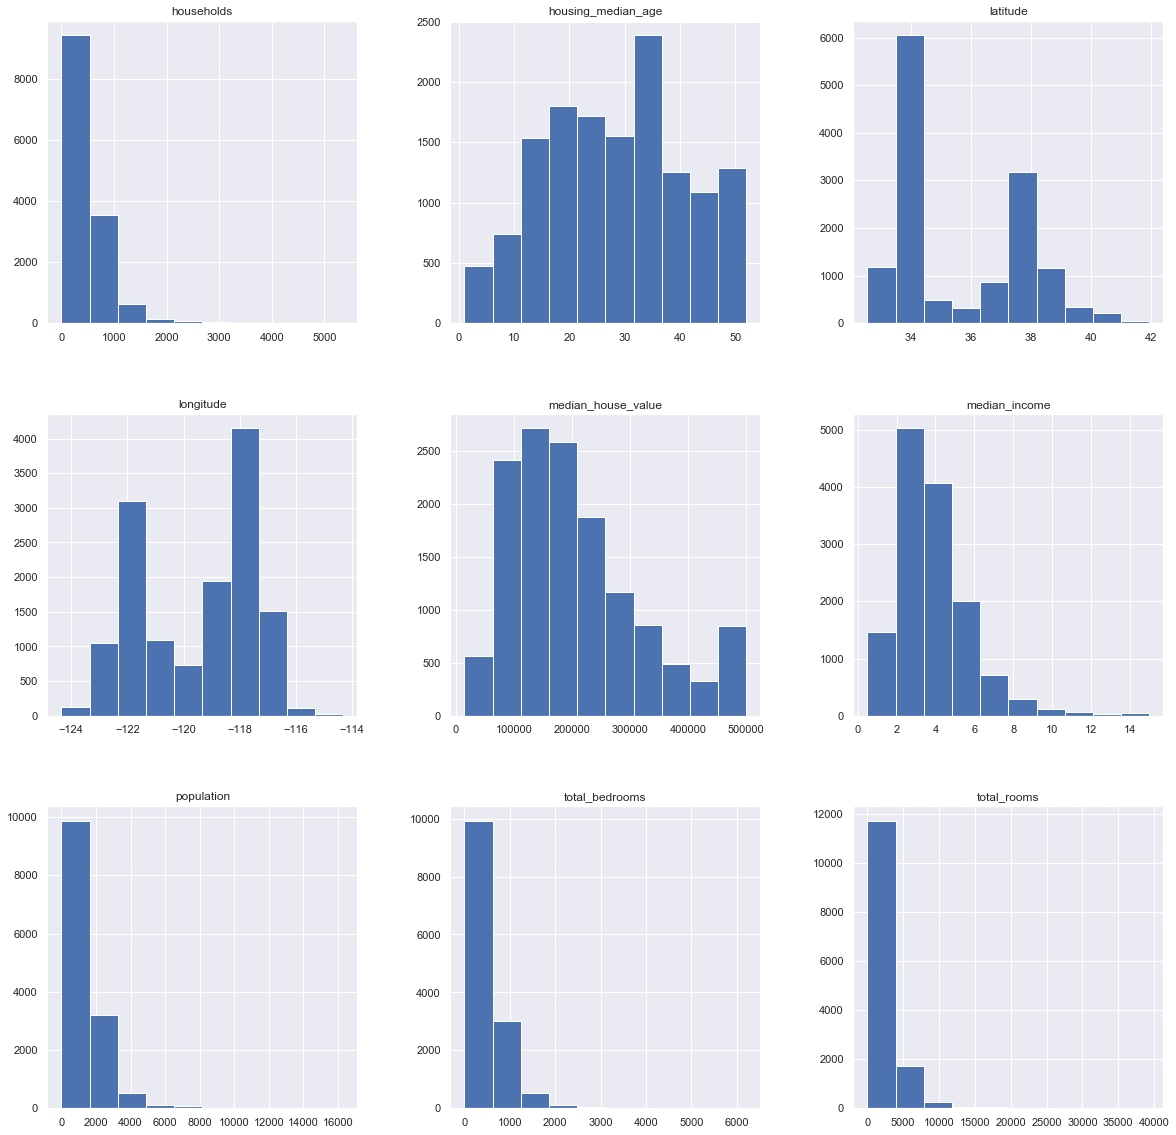

In [11]:
sns.set() # define the plot style
df_train.hist(bins=10, figsize=(20,20))
#hist: histogram
plt.show()

<font color=red> We plot the house price and population w.r.t the long/lat.
coordinate
</font>

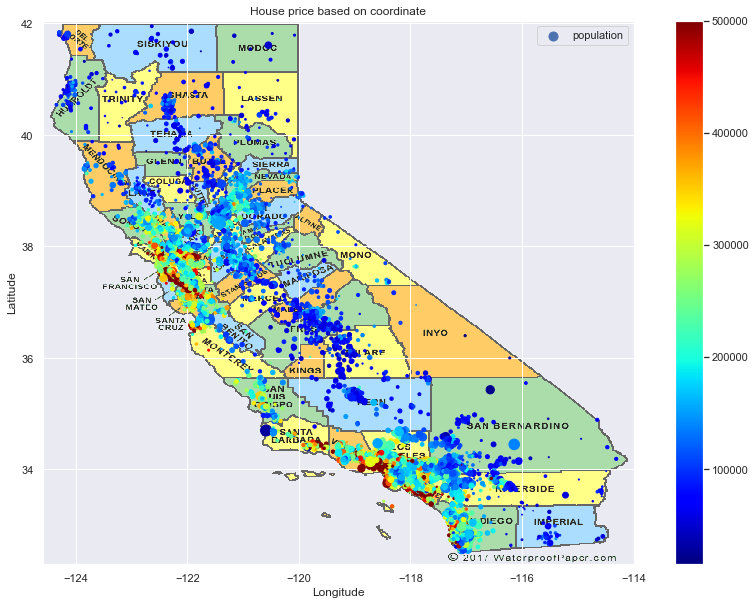

In [12]:
import matplotlib.image as mpimg

california_img=mpimg.imread('data/california-county-map.gif')
plt.figure(figsize=(15,10))
plt.imshow(california_img, extent=[-124.59, -114, 32.3, 42.05])
#In scatter (plotting discrete points): c-> color, s->size
plt.scatter(
            df_train['longitude'],df_train['latitude'],
            c=df_train['median_house_value'],
            s=df_train['population']/100, label='population', 
            cmap=plt.get_cmap("jet")
           )
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend() 
plt.title('House price based on coordinate')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18c61ba8>,
      dtype=object)

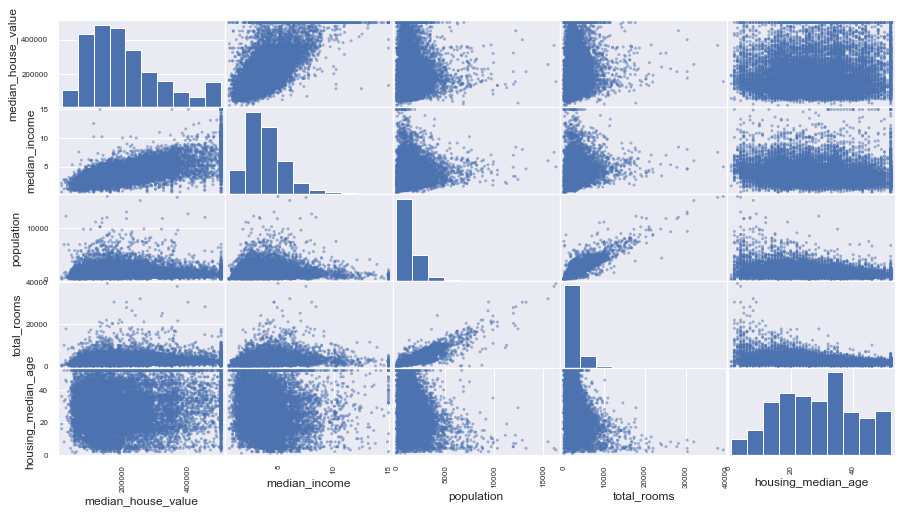

In [13]:
# scatter plot-> Correlation between cols in the data frame
from pandas.plotting  import scatter_matrix
features = ['median_house_value','median_income','population','total_rooms', 
            'housing_median_age']
scatter_matrix(df_train[features],figsize=(15,8))

Clean Data

In [14]:
#check missing values
df_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        130
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<font color=red> How to deal with missing values? </font>


<font color=red> 
    
    1. Delete total_bedrooms features
    
    2. Drop 130 sample without total_bedrooms
    
    3. Use the stats. info. of the the total_bedrooms 
</font>

In [15]:
median = df_train["total_bedrooms"].median() # option 3 
df_train_fixed = df_train.copy() # copy a dataframe
df_train_fixed["total_bedrooms"].fillna(median, 
                                        inplace=True)

In [16]:
df_train_fixed.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<font color=red> Do the same thing for test data </font>

In [17]:
df_test_fixed = df_test.copy()
df_test_fixed['total_bedrooms'].fillna(median, inplace=True)

In [18]:
df_test_fixed.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 10 columns):
longitude             13828 non-null float64
latitude              13828 non-null float64
housing_median_age    13828 non-null float64
total_rooms           13828 non-null float64
total_bedrooms        13698 non-null float64
population            13828 non-null float64
households            13828 non-null float64
median_income         13828 non-null float64
median_house_value    13828 non-null float64
ocean_proximity       13828 non-null object
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [20]:
df_train['ocean_proximity']

0         <1H OCEAN
1        NEAR OCEAN
2         <1H OCEAN
3         <1H OCEAN
4            INLAND
5            INLAND
6         <1H OCEAN
7            INLAND
8         <1H OCEAN
9         <1H OCEAN
10        <1H OCEAN
11        <1H OCEAN
12        <1H OCEAN
13           INLAND
14           INLAND
15           INLAND
16       NEAR OCEAN
17        <1H OCEAN
18         NEAR BAY
19         NEAR BAY
20           INLAND
21        <1H OCEAN
22        <1H OCEAN
23       NEAR OCEAN
24        <1H OCEAN
25        <1H OCEAN
26        <1H OCEAN
27         NEAR BAY
28        <1H OCEAN
29       NEAR OCEAN
            ...    
13798        INLAND
13799     <1H OCEAN
13800        INLAND
13801     <1H OCEAN
13802     <1H OCEAN
13803     <1H OCEAN
13804        INLAND
13805        INLAND
13806        INLAND
13807        INLAND
13808      NEAR BAY
13809     <1H OCEAN
13810    NEAR OCEAN
13811     <1H OCEAN
13812        INLAND
13813        INLAND
13814     <1H OCEAN
13815     <1H OCEAN
13816      NEAR BAY


<font color=red> Use OneHotEncoder to deal with category features
<br>
    For simplicty, we just drop it
</font>


<font color=red> Use LabelEncoder </font>

In [21]:
from sklearn import preprocessing

In [22]:
le = preprocessing.LabelEncoder()

In [23]:
le.fit(df_train['ocean_proximity'])

LabelEncoder()

In [24]:
le.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [25]:
df_train['ocean_proximity_labelcoded'] = le.transform(df_train['ocean_proximity'])

In [26]:
df_train[['ocean_proximity', 'ocean_proximity_labelcoded']].head()

,ocean_proximity,ocean_proximity_labelcoded
0,<1H OCEAN,0
1,NEAR OCEAN,4
2,<1H OCEAN,0
3,<1H OCEAN,0
4,INLAND,1


<font color=red> Manually map Category Features into Interger values </font>

In [27]:
df_train['ocean_proximity_manuallycoded'] = df_train['ocean_proximity'].map({'<1H OCEAN': 2, 'INLAND': 1,
                                                                            'NEAR BAY':3, 'NEAR OCEAN':4})

In [28]:
df_train[['ocean_proximity', 'ocean_proximity_labelcoded', 'ocean_proximity_manuallycoded']].head()

,ocean_proximity,ocean_proximity_labelcoded,ocean_proximity_manuallycoded
0,<1H OCEAN,0,2.0
1,NEAR OCEAN,4,4.0
2,<1H OCEAN,0,2.0
3,<1H OCEAN,0,2.0
4,INLAND,1,1.0


In [29]:
# two choices
# 1. convert category labels by   from sklearn.preprocessing import OneHotEncoder
# 2. drop that col.
df_train_fixed.drop(['ocean_proximity'], axis=1, inplace=True)

In [30]:
df_test_fixed.drop(['ocean_proximity'], axis=1, inplace=True)

<font color=red> Extract features and labels for linear regession model </font>

In [31]:
X_train = df_train_fixed.drop(['median_house_value'], axis=1).values
#values will convert all the data in the dataFrame to the numpy array

In [32]:
X_train

array([[-1.1837e+02,  3.3870e+01,  1.9000e+01, ...,  3.6100e+02,
         1.4100e+02,  6.0200e+00],
       [-1.2086e+02,  3.5390e+01,  2.3000e+01, ...,  6.2900e+02,
         2.7900e+02,  2.7344e+00],
       [-1.1718e+02,  3.3160e+01,  1.5000e+01, ...,  3.9430e+03,
         1.0060e+03,  3.1793e+00],
       ...,
       [-1.2176e+02,  3.7330e+01,  5.0000e+00, ...,  2.4350e+03,
         6.9700e+02,  5.6306e+00],
       [-1.2244e+02,  3.7780e+01,  4.4000e+01, ...,  5.6100e+02,
         3.2600e+02,  3.8750e+00],
       [-1.1908e+02,  3.6210e+01,  2.0000e+01, ...,  1.2410e+03,
         3.4800e+02,  2.5156e+00]])

In [33]:
#df_train_fixed

In [34]:
# Extract the labels
y_train = df_train_fixed['median_house_value'].values

In [35]:
len(list(df_train))

12

In [36]:
X_train.shape

(13828, 8)